# DAE 7 Checking Parametric Data

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

After working your way through this notebook you should be able to..
-   Explain assumptions for parametric tests
      - interval or ratio data
      - normal distribution
      - similar variance
-   Test the validity of these assumptions        

  Table of Contents
  -----
- [1 Parametric Data](#Parametric)
- [2 Assumptions for parametric tests](#Assumptions)
    - [2.1 Interval data ](#Interval)
    - [2.2 Equal variance](#EqualVariance)
    - [2.3 Data from Normal Distribution](#NormalDist)
- [3 Apply Caution and Common sense](#CommonSense)
    - [3.1 What if my data is not parametric?](#Alternatives)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import files

uploaded = files.upload()

<a id= 'Parametric'> </a>


## 1. Parametric Data

As we have already concluded, frequency distributions give us the access to the probability that an event will occur. When we use inferential statistics, we are interested in making models of the data that will tell us something about how likely we are to observe changes in sample means just by chance. 

If we know that the type of frequency distribution we are dealing with is *normal*, we have the options of using parametric tests. These tests have *more statistical power* than tests for non-normal distributions. That is, given a specific alpha-level, we are more likely to detect a real change with smaller sample sizes when we use parametric tests than when we use non-parametric tests. 

So there are plenty of reasons for us to want parametric data. Correspondingly, we have to check that our data fulfill some assumptions, if we wish to use the parametric tests.

The assumptions are based on the knowledge that parametric tests use the (arithmetic) mean and variance - characteristics that describe the normal distribution. It is therefore important for us to ensure that these measures are meaningful and accurate enough **for our data**. Otherwise the parametric tests will not owrk as intended. That is, we can still run the parametric test functions, but cannot trust the results that they yield. 

<a id= 'Assumptions'> </a>

## 2 Assumptions for parametric tests

Before we can start using parametric tests to test hypotheses, we need to check that our data fulfill some criteria: 

- Data should be on an interval or ratio scale

- Variances should be approximately equal for different groups (e.g. experimental v.s control condition)

- Data come from a normally distributed population

How can we find out if the data fulfills these criteria?
Looking at the data is a good first step, but perhaps not enough. There are some tests that can be use to get a more objective view. For both approaches, some common sense has to be applied. 


<a id= 'Interval'> </a>

### 2.1 Interval data

If the measurement is based on physical measures (e.g. time, voltage, distance, level of stress hormone..) there is not much to worry about here. But if you have collected ratings and used ordinal scales, this assumption is violated. This is yet another reason to think carefully before choosing the type of measurement to use. 

Likert items as a rule tend to use ordinal scales. However, if a subscale is based on several Likert items that are combined, one could argue that the measure could be considered an interval scale. Views on this differ.

If using a visual analogue scale for the ratings, it is not ordered categorical data any more. If there is reason to believe that the distance along the scale is consistent, one could argue that it is interval data.

Let us look at some real data (Stroopdata.txt). The data is from a known psychological experiment and shows the time (in seconds) each participant needed to label the colours in, where the colours can be either "congruent" with the word  or "incongruent" as here:


<img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Stroop_icon.svg" width="200">
Grutness at en.wikipediaOwn work, Public domain, via Wikimedia Commons


In [3]:
# We load some data from a stroop test.
data = pd.read_csv('Stroopdata.txt', delimiter = '\t', index_col=0,header=0) 
data.describe()

# you can also describe only one variable like this
#data.Incongruent.describe() 

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Try out 1: 

What measurement scale is used? Does it fulfill the assumption of interval data?

<a id= 'EqualVariance'> </a>

### 2.2 Equal variance
An important assumption is that the data has (approximately) equal variance. This is important because **the variance says something about the precision of the mean**, and so it is not ideal for different groups we compare to have different mean measurement precisions. 

This is also an assumption that is easily violated when using small sample sizes. This is logical, because the larger the sample, the more similar the sample variance will be to the true variance of the population. 

Typically, we would start by looking at the spread of the data. Box plots are also useful here, because they quickly can help to summarize where the majority of data points are, and whether there are outliers.

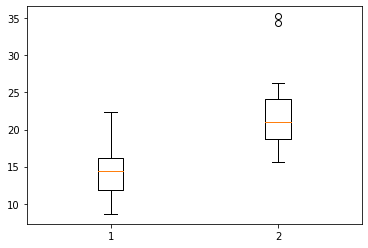

In [4]:
# Plot the data for the two cases
plt.boxplot([data.Congruent,data.Incongruent])
plt.show()


#### Levene test
We can also use a test such as the Levene test. In the help information for the function, we can read that "The Levene test tests the null hypothesis that all input samples are from populations with equal variances." 
So to test whether we can use parametric tests, we actually use other statistical tests. And just like the statistical tests we want to use for our main hypothesis, we also need to be careful about the use and interpretation of these tests. 

In [5]:
# Levene variance test for the two groups, exclude NaN values
stats.levene(data.Congruent.dropna(), data.Incongruent.dropna())
#help(stats.levene) #to check details

LeveneResult(statistic=0.2502499448677214, pvalue=0.6192840699128219)

How should the output be interpreted? The p-value gives the probability that the two samples come from populations with equal variances. The test statistic is something we report together with the p-value when writing, so that others can check up on whether it was correct, but otherwise we do not use it much.

### Try out 2: 
Based on the output of the Levene test, would you consider the assumption of equal variances fulfilled?


<a id= 'NormalDist'> </a>

### 2.3 Data from Normal Distribution
Typically, this assumption is checked by plotting histograms of data. This can be a good start, but also deceptive. What we are trying to determine is the type of distribution of *the population* that the sample was drawn from. It is not easy to determine the shape of the distribution based on a histogram. Especially for smaller sample sizes, the histogram shape can vary a lot, and is also dependent on the number of frequency bins (value ranges) used to display the data. Here too, it makes sense to use other ways to look at the data and test the assumption. 


#### QQ-plots
QQ plots show the actual data points plotted against what could be expected if they had been drawn from a population with normal distribution. This is done by ordering the values against the theoretical quantiles. Ideally, the points should all line up along the diagonal. It is seldom seen that they do so perfectly, but when the data is offset too much, wiggles around the line, or forms an s-shape around the line, there is reason for caution. 

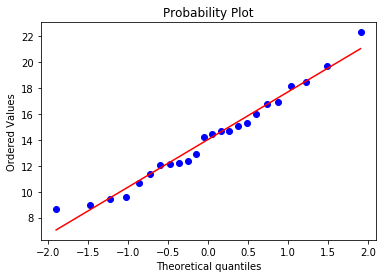

In [6]:
# Use stats.probplot to make a qq-plot
stats.probplot(data.Congruent, plot=plt);

# Now do it for Incongruent. Similar result?
# stats.probplot(data.Incongruent, plot=plt);

#### Normality tests
There are several tests for normality, one being the Shapiro-Wilk test. This also tests a hypothesis (they all do) so it is a good practice to check the 'help' of a function to know how the hypothesis is formulated. 


### Try out 3: 
Check the hypothesis of the Shapiro-Wilk test. Perform the test for both congruent and incongruent data.

In [7]:
# Shapiro-Wilk normality test for Congruent group 
#help(stats.shapiro)
# stats.shapiro(data.Congruent)


Given the results, it is not likely that the data in the Incongruent group is from a normal distribution. And indeed, when we plot the histogram, it has a clear positive skew. This is not uncommon for reaction time data when there is something that requires some extra cognitive effort. Some people will take much longer to respond than others, whereas it is the natural limits of neural communication that determine how fast responses that can be recorded.

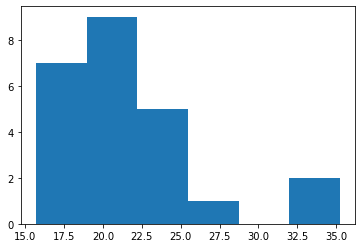

In [ ]:
plt.hist(data.Incongruent, bins=6)
plt.show()

<a id= 'CommonSense'> </a>

## 3. Apply Caution and Common Sense

As mentioned above, there are some benefits of both plotting and testing - but also several things to be aware of. Histograms do not give a good idea of normality for small sample sizes, and it is difficult to know *how* much of a difference from normal is "acceptable". Here, the tests can help. However, as the power of a test is dependent on sample size, even small deviations in large sample sizes can light up the "significant"-flag, implying that data is significantly different from normality distributed data. Like for any other statistical test, we also accept a certain probability of making Type I (and Type II) errors.

On the one hand, normally distributed data is perhaps not as commonly occuring in experiments as we would like it to be. On the other hand, several tests are also known to be robust enough to handle that data does not come from a perfectly normally distributed population. The violation of unequal variances is typically more severe. 

### Try out 4: 
Does this data fulfil the assumptions for parametric tests? Plot the data and perform tests for normality and equal variances as above. Change K so that sample sizes are 

- 20
- 100
- 1000

Also plot histograms of the data.

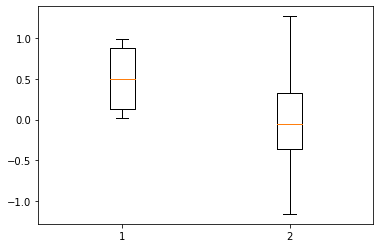

In [ ]:
#Does this data fulfil the assumptions for parametric tests?

K=20 #variable for sample size
score1=np.random.beta(0.4,0.5,K)
score2=np.random.normal(0.01,0.5,K)

#plot box plots
plt.boxplot([score1,score2])
plt.show()
#plot qq-plots and perform tests for normality and equal variance
#

As seen in this example, the higher sample size may result in a result that does not align with what we expect (given that the data is actually generated from a known distribution).

<a id= 'Alternatives'> </a>

### 3.1 What if my data is not parametric?

If the assumptions for parametric data are violated, parametric tests should not be used. For most kinds of parametric tests, there is a corresponding non-parametric test that can be used as an alternative for data that do not fulfill the criteria. The reason why these tests are not the first choice is, again, that the power of parametric tests is greater, and so we in general need larger samples to detect effects in non-parametric data.

To help guide you to the right type of test, there are flow charts such as this one:

https://miro.medium.com/max/2000/1*LSlOc0hwlX20VyTm5DUu6w.png